# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Nia Savova

I have used the following AI tools: ChatGPT for barplot and lineplot syntax

I understand that my submission needs to be my own work: NS

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [ ]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [ ]:
# !jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
# make sure numpy is installed
!pip install -q numpy

In [15]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [16]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [4]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: south
step 2 - action: north
step 3 - action: suck
step 4 - action: suck
step 5 - action: west
step 6 - action: south
step 7 - action: south
step 8 - action: west
step 9 - action: west
step 10 - action: north
step 11 - action: south
step 12 - action: west
step 13 - action: north
step 14 - action: east
step 15 - action: south
step 16 - action: suck
step 17 - action: north
step 18 - action: suck
step 19 - action: north


4

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [17]:
# define environment based on fully cleaned
def proper_fully_cleaned_environment(agent_function, n, max_steps = 0, verbose = True): #max_steps = 0):
    # define necessary variables
    if max_steps == 0:
      max_steps = n**3 # not good model if it takes more than n^3
    num_cleaned = 0
    rng = np.random.default_rng()
    p = 0.5
    n = n
    floor = rng.choice([True, False], size = (n, n), p = [p, 1-p])
    position = [np.random.randint(0, n-1), np.random.randint(0, n-1)]
    dirt = floor.sum()
    actions_taken = 0
    bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

    i = 0
    j = 0
    while (i < (dirt)):
      # end process if fully cleaned or max_steps defined reached
        if (i == dirt):
          return num_cleaned, actions_taken
        if (j == max_steps):
          actions_taken = np.inf
          return num_cleaned, actions_taken
        dirty = floor[position[0], position[1]]

        # defined bumpers
        if (position[0] == 0):
          bumpers["west"] = True
        elif (position[0] != 0):
          bumpers["west"] = False
        if (position[0] == n-1):
          bumpers["east"] = True
        elif (position[0] != n-1):
          bumpers["east"] = False
        if (position[1] == 0):
          bumpers["north"] = True
        elif (position[1] != 0):
          bumpers["north"] = False
        if (position[1] == n-1):
          bumpers["south"] = True
        elif (position[1] != n-1):
          bumpers["south"] = False

        # define action and change environment/position
        action = agent_function(bumpers, dirty)
        actions_taken += 1

        if (action == "suck"):
          if (floor[position[0], position[1]]):
            i += 1
            num_cleaned += 1
            floor[position[0], position[1]] = False
        elif (action == "north"):
          if (position[1] == 0):
            pass
          else:
            position[1] -= 1
        elif (action == "south"):
          if (position[1] == n-1):
            pass
          else:
            position[1] += 1
        elif (action == "west"):
          if (position[0] == 0):
            pass
          else:
            position[0] -= 1
        elif (action == "east"):
          if (position[0] == n-1):
            pass
          else:
            position[0] += 1

        i=i
        j += 1
        if (verbose): print("step", j , "- action:", action, "position: ", position)

    return num_cleaned, actions_taken

In [ ]:
# define environment based on max_steps
def proper_max_steps_environment(agent_function, max_steps, verbose = True):
  #define necessary variables
    num_cleaned = 0
    rng = np.random.default_rng()
    p = 0.5
    n = 5
    floor = rng.choice([True, False], size = (n, n), p = [p, 1-p])
    position = [0, 0]
    dirt = floor.sum()

    # stop based on max_steps passed in
    for i in range(max_steps):
        dirty = floor[position[0], position[1]]

        # define action and change position/environment
        action = agent_function(bumpers, dirty)

        if (action == "suck"):
          if (floor[position[0], position[1]]):
            num_cleaned = num_cleaned + 1
            floor[position[0], position[1]] = False
        elif (action == "north"):
          if (position[1] == 0):
            i -= 1
          else:
            position[1] -= 1
        elif (action == "south"):
          if (position[1] == n-1):
            i -= 1
          else:
            position[1] += 1
        elif (action == "west"):
          if (position[0] == 0):
            i -= 1
          else:
            position[0] -= 1
        elif (action == "east"):
          if (position[0] == n-1):
            i -= 1
          else:
            position[0] += 1

        if (verbose): print("step", i , "- action:", action, "position: ", position)

    return num_cleaned, dirt

Show that your environment works with the simple randomized agent from above.

In [ ]:
cleaned, actions_taken = proper_fully_cleaned_environment(simple_randomized_agent, verbose = False)
max_steps = 500
num_cleaned, dirty = proper_max_steps_environment(simple_randomized_agent, max_steps, verbose = False)
print("MODEL 2 -> Cells cleaned: ", cleaned, " And actions taken: ", actions_taken)
print("MODEL 1 -> Cells cleaned: ", num_cleaned, "/", dirty, " And max actions: ", max_steps)


MODEL 2 -> Cells cleaned:  12  And actions taken:  846
MODEL 1 -> Cells cleaned:  7 / 7  And max actions:  500


## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [18]:
def simple_reflex_agent(bumpers, dirty):
    if (dirty):
      return "suck"
    elif (bumpers["north"]== True): # check bumper
      not_north = np.random.choice(actions)
      while (not_north == "north"): # return any value that is not equal to bumper
        not_north = np.random.choice(actions)
      return not_north
    elif (bumpers["south"]== True):
      not_south = np.random.choice(actions)
      while (not_south == "south"):
        not_south = np.random.choice(actions)
      return not_south
    elif (bumpers["east"]== True):
      not_east = np.random.choice(actions)
      while (not_east == "east"):
        not_east = np.random.choice(actions)
      return not_east
    elif (bumpers["west"]== True):
      not_west = np.random.choice(actions)
      while (not_west == "west"):
        not_west = np.random.choice(actions)
      return not_west
    else: # no bumper signal return any action
      return np.random.choice(actions)

Show how the agent works with your environment.

In [ ]:
cleaned, actions_taken = proper_fully_cleaned_environment(simple_reflex_agent, n = 5, verbose = False)
print("MODEL 2 -> Cells cleaned: ", cleaned, " And actions taken: ", actions_taken)


MODEL 2 -> Cells cleaned:  9  And actions taken:  276


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
# the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares

In [19]:
class Agent:
  def __init__(self, size): #bumpers and dirty
        self.floor = np.zeros((size, size)) # visited 1, else 0
        self.position = [-1, -1]
        self.state = "calibrating" # state used to define starting spot


  def model_reflex_agent(self, bumpers, dirty):
      # check state and update if top left corner reached
      if ((bumpers["north"] == True) & (bumpers["west"] == True)):
        self.position = [0, 0]
        self.state = "done"
      while (self.state == "calibrating"):
        if (bumpers["north"] == False): # find north wall
          return "north"
        elif (bumpers["west"] == False): # find west wall
          return "west"
        else:
          self.state = "done"

      # cleaning and navigating room
      self.floor[self.position[0], self.position[1]] = 1
      if (dirty):
        return "suck"
        # first row
      elif ((bumpers["north"] == True)):
        if (bumpers["east"] == True):
          self.position[1] += 1
          return "south"
        else:
          self.position[0] += 1
          return "east"
      #final row
      elif ((bumpers["south"] == True)):
        if (bumpers["east"] == True):
          self.position[0] -= 1
          return "west"
        elif (bumpers["west"] == True):
          self.position[0] += 1
          return "east"
      # move left to right up to down to traverse whole area
      if ((bumpers["east"] == True) & (self.floor[self.position[0] - 1, self.position[1]] == 1)):
        self.position[1] += 1
        return "south" # move down if not yet visited and wall on right
      elif ((bumpers["east"] == True) & (self.floor[self.position[0] - 1, self.position[1]] == 0)):
        self.position[0] -= 1
        return "west" # move left if not yet traversed and wall on right
      elif ((bumpers["west"] == True) & (self.floor[self.position[0] + 1, self.position[1]] == 1)):
        self.position[1] += 1
        return "south" # move down if not yet visited and wall on left
      elif ((bumpers["west"] == True) & (self.floor[self.position[0] + 1, self.position[1]] == 0)):
        self.position[0] += 1
        return "east" # move right if not yet traversed and wall on left
      elif self.floor[self.position[0] + 1, self.position[1]] == 0:
        self.position[0] += 1
        return "east" # move right if not yet traversed and visited on left
      elif self.floor[self.position[0] - 1, self.position[1]] == 0:
        self.position[0] -= 1
        return "west" # move left if not yet traversed and visited on right


Show how the agent works with your environment.

In [29]:
max_steps = 100

size = 5
agent = Agent(size = size)
cleaned2, actions_taken2 = proper_fully_cleaned_environment(agent.model_reflex_agent, max_steps = max_steps, n = 3, verbose = False)
print("MODEL 3 -> Cells cleaned: ", cleaned2, " And actions taken: ", actions_taken2)
num_cleaned, actions_taken = proper_fully_cleaned_environment(simple_reflex_agent, n = 3, max_steps = max_steps, verbose = False)
print("MODEL 2 -> Cells cleaned: ", num_cleaned, " And actions taken: ", actions_taken)
cleaned, actions_taken = proper_fully_cleaned_environment(simple_randomized_agent, n = 3, max_steps = max_steps, verbose = False)
print("MODEL 1 -> Cells cleaned: ", cleaned, " And actions taken: ", actions_taken)

[[False False  True]
 [False  True False]
 [ True  True False]] 
 [0, 1]
MODEL 3 -> Cells cleaned:  4  And actions taken:  11
[[ True  True  True]
 [ True  True False]
 [ True False  True]] 
 [0, 0]
MODEL 2 -> Cells cleaned:  4  And actions taken:  100
[[False  True  True]
 [ True False False]
 [ True  True  True]] 
 [1, 0]
MODEL 1 -> Cells cleaned:  6  And actions taken:  63


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [192]:
# collect number of actions for 5x5 small for all agents
size = 5
small_simple = []
small_model = []
small_random = []
max_steps = np.inf

for i in range(100):
  agent_small = Agent(size = size)
  cleaned_model, actions_model = proper_fully_cleaned_environment(agent_small.model_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_simple, actions_simple = proper_fully_cleaned_environment(simple_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_random, actions_random = proper_fully_cleaned_environment(simple_randomized_agent, n = size, verbose = False, max_steps = max_steps)
  small_simple.append(actions_simple)
  small_model.append(actions_model)
  small_random.append(actions_random)

In [198]:
# collect number of actions for 10x10 medium for all agents
medium_simple = []
medium_model = []
medium_random = []
size = 10
for i in range(100):
  agent_med = Agent(size = size)
  cleaned_model, actions_model = proper_fully_cleaned_environment(agent_med.model_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_simple, actions_simple = proper_fully_cleaned_environment(simple_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_random, actions_random = proper_fully_cleaned_environment(simple_randomized_agent, n = size, verbose = False, max_steps = max_steps)
  medium_simple.append(actions_simple)
  medium_model.append(actions_model)
  medium_random.append(actions_random)

In [205]:
# collect number of actions for 100 x 100 large for all agents
# takes about 1 hour to run
large_simple = []
large_model = []
large_random = []
size = 100
for i in range(100):
  agent_big = Agent(size = size)
  cleaned_model, actions_model = proper_fully_cleaned_environment(agent_big.model_reflex_agent, n = size, verbose = False, max_steps = np.inf)
  cleaned_simple, actions_simple = proper_fully_cleaned_environment(simple_reflex_agent, n = size, verbose = False, max_steps = np.inf)
  cleaned_random, actions_random = proper_fully_cleaned_environment(simple_randomized_agent, n = size, verbose = False, max_steps = np.inf)
  large_simple.append(actions_simple)
  large_model.append(actions_model)
  large_random.append(actions_random)

In [206]:
# combine on all agents as average number of acctions per room
import pandas as pd
simple_agent = []
simple_agent.append(pd.DataFrame(large_simple).mean())
simple_agent.append(pd.DataFrame(medium_simple).mean())
simple_agent.append(pd.DataFrame(small_simple).mean())
simple_agent = pd.DataFrame(simple_agent)

model_agent = []
model_agent.append(pd.DataFrame(large_model).mean())
model_agent.append(pd.DataFrame(medium_model).mean())
model_agent.append(pd.DataFrame(small_model).mean())
model_agent = pd.DataFrame(model_agent)

random_agent = []
random_agent.append(pd.DataFrame(large_random).mean())
random_agent.append(pd.DataFrame(medium_random).mean())
random_agent.append(pd.DataFrame(small_random).mean())
random_agent = pd.DataFrame(random_agent)

In [207]:
print(simple_agent)
print(model_agent)
print(random_agent)

           0
0  499202.72
1    1516.71
2     198.91
          0
0  15089.05
1    156.48
2     38.89
           0
0  937009.90
1    3891.18
2     592.28


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 592.28|198.91 |38.89 |
| 10x10   |  3891.18|1516.71 |156.48 |
| 100x100 | 937009.90| 499202.72| 15089.05|

Add charts to compare the performance of the different agents.

In [6]:
# create data frame based on data collected above
import pandas as pd

all_agents = {
    'Size': ['5x5', '10x10', '100x100'],
    'Randomized Agent': [592.28, 3891.18, 937009.90],
    'Simple Reflex Agent': [198.91, 1516.71, 499202.72],
    'Model-based Reflex Agent': [38.89, 156.48, 15089.05]
}
df = pd.DataFrame(all_agents)
df.set_index('Size', inplace=True)

print(df)


         Randomized Agent  Simple Reflex Agent  Model-based Reflex Agent
Size                                                                    
5x5                592.28               198.91                     38.89
10x10             3891.18              1516.71                    156.48
100x100         937009.90            499202.72                  15089.05


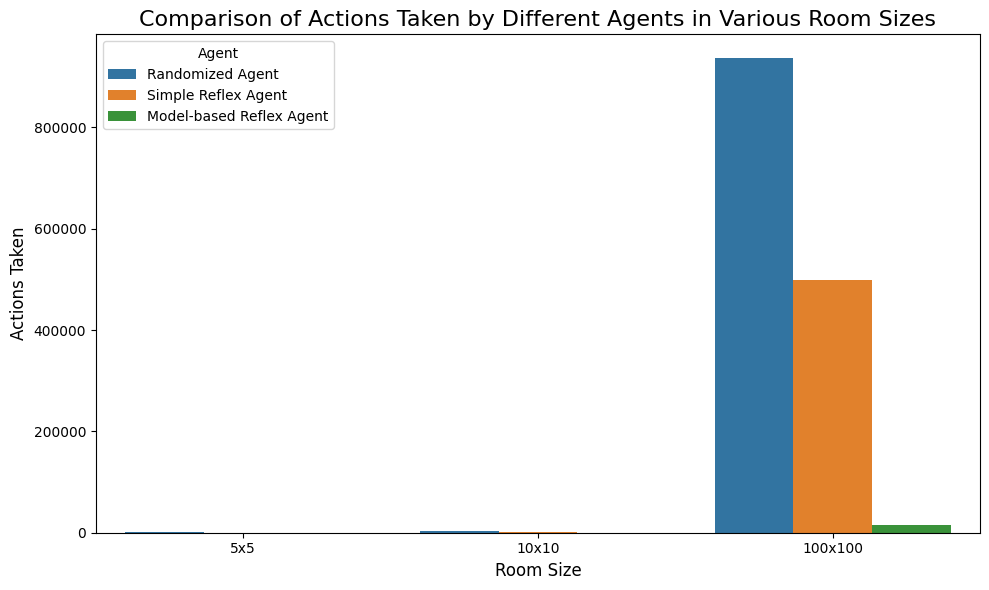

In [7]:
# barplot to compare
import matplotlib.pyplot as plt
import seaborn as sns

df_melted = df.reset_index().melt(id_vars=["Size"], var_name="Agent", value_name="Actions")
plt.figure(figsize=(10, 6))
sns.barplot(x="Size", y="Actions", hue="Agent", data=df_melted)
plt.title('Comparison of Actions Taken by Different Agents in Various Room Sizes', fontsize=16)
plt.xlabel('Room Size', fontsize=12)
plt.ylabel('Actions Taken', fontsize=12)
plt.tight_layout()
plt.show()

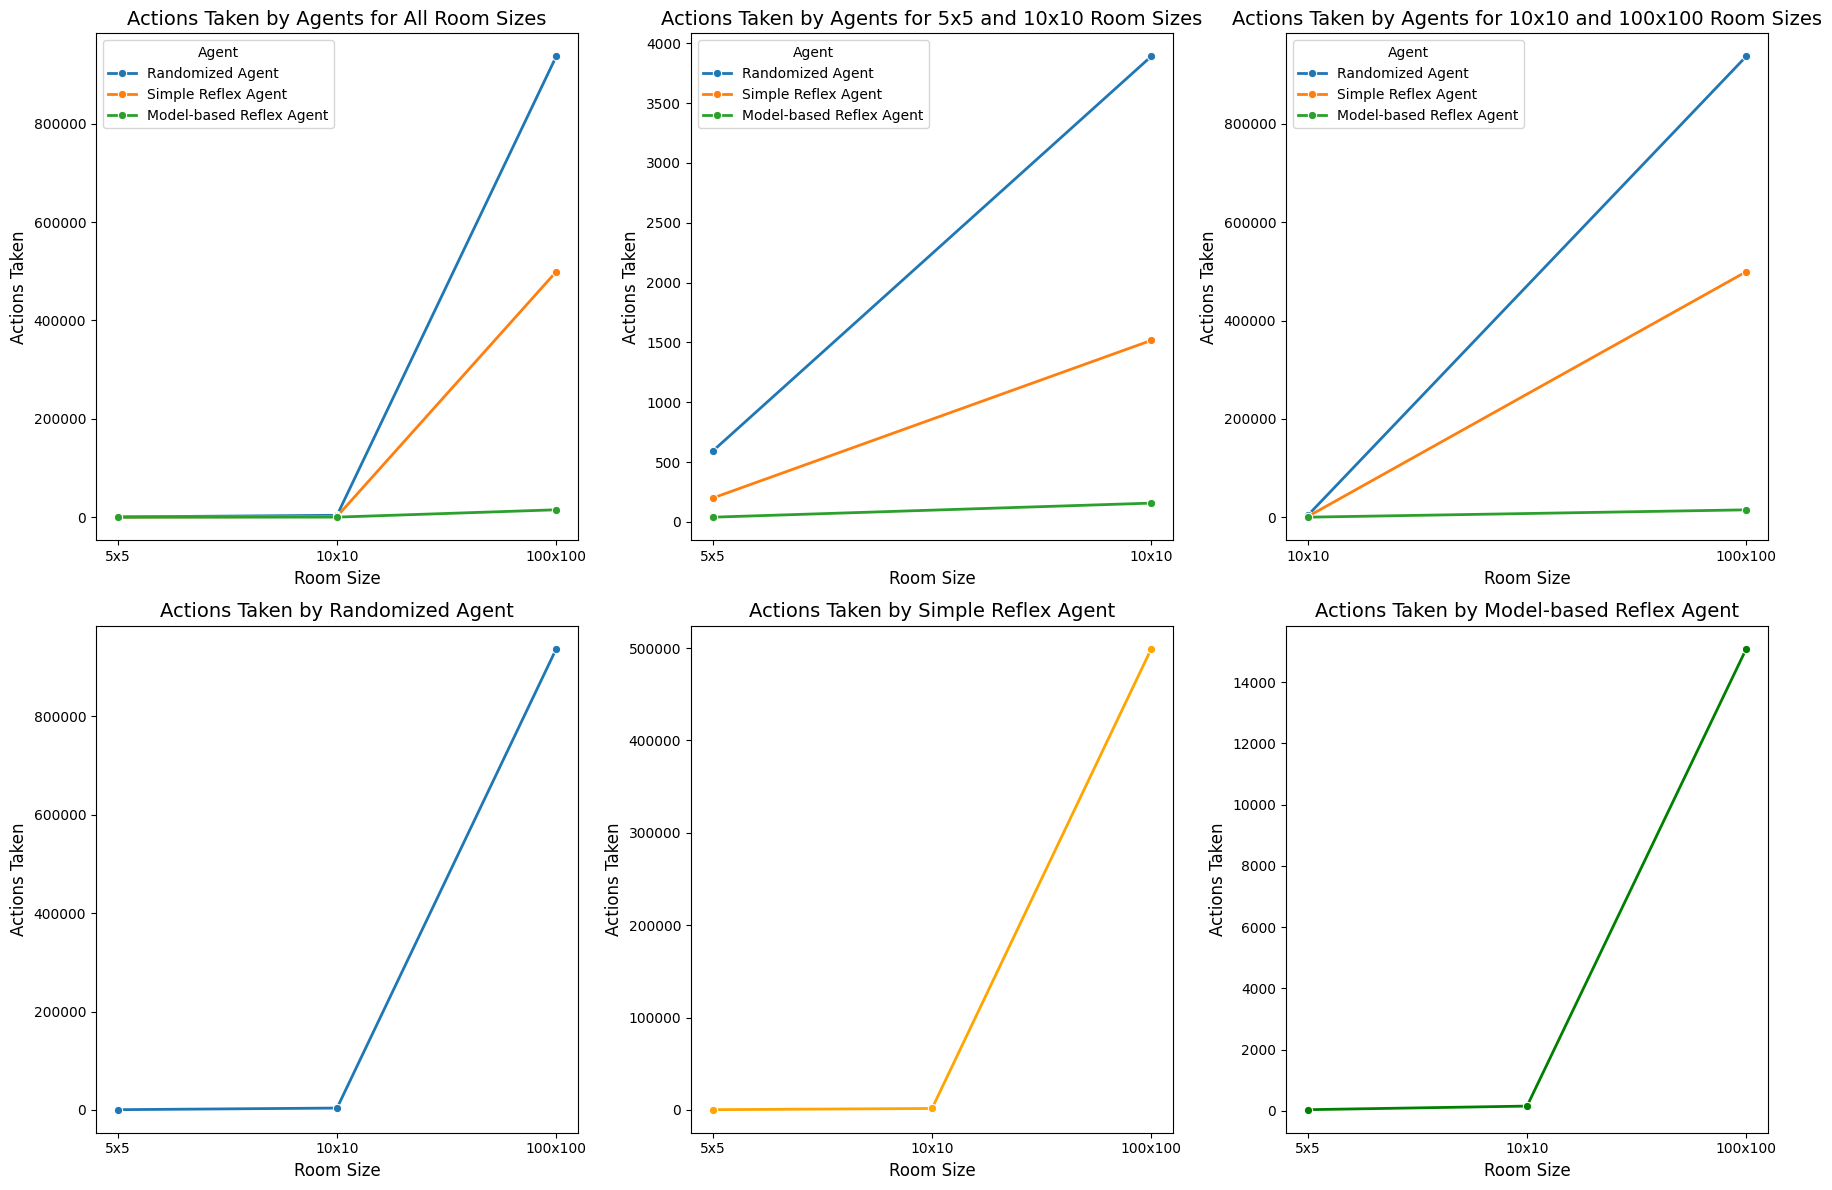

In [12]:
# lineplots to compare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Regular line plot (all room sizes)
sns.lineplot(x="Size", y="Actions", hue="Agent", data=df_melted, marker='o', linestyle='-', linewidth=2, ax=axs[0, 0])
axs[0, 0].set_title('Actions Taken by Agents for All Room Sizes', fontsize=14)
axs[0, 0].set_xlabel('Room Size', fontsize=12)
axs[0, 0].set_ylabel('Actions Taken', fontsize=12)

# Line plot for 5x5 and 10x10 room sizes
sns.lineplot(x="Size", y="Actions", hue="Agent", data=df_melted[df_melted['Size'].isin(['5x5', '10x10'])],
             marker='o', linestyle='-', linewidth=2, ax=axs[0, 1])
axs[0, 1].set_title('Actions Taken by Agents for 5x5 and 10x10 Room Sizes', fontsize=14)
axs[0, 1].set_xlabel('Room Size', fontsize=12)
axs[0, 1].set_ylabel('Actions Taken', fontsize=12)

# Line plot for 10x10 and 100x100 room sizes
sns.lineplot(x="Size", y="Actions", hue="Agent", data=df_melted[df_melted['Size'].isin(['10x10', '100x100'])],
             marker='o', linestyle='-', linewidth=2, ax=axs[0, 2])
axs[0, 2].set_title('Actions Taken by Agents for 10x10 and 100x100 Room Sizes', fontsize=14)
axs[0, 2].set_xlabel('Room Size', fontsize=12)
axs[0, 2].set_ylabel('Actions Taken', fontsize=12)

# Line plot for Randomized Agent
sns.lineplot(x="Size", y="Actions", data=df_melted[df_melted['Agent'] == 'Randomized Agent'],
             marker='o', linestyle='-', linewidth=2, ax=axs[1, 0])
axs[1, 0].set_title('Actions Taken by Randomized Agent', fontsize=14)
axs[1, 0].set_xlabel('Room Size', fontsize=12)
axs[1, 0].set_ylabel('Actions Taken', fontsize=12)

# Line plot for Simple Reflex Agent
sns.lineplot(x="Size", y="Actions", data=df_melted[df_melted['Agent'] == 'Simple Reflex Agent'],
             marker='o', linestyle='-', linewidth=2, ax=axs[1, 1], color = 'orange')
axs[1, 1].set_title('Actions Taken by Simple Reflex Agent', fontsize=14)
axs[1, 1].set_xlabel('Room Size', fontsize=12)
axs[1, 1].set_ylabel('Actions Taken', fontsize=12)

# Line plot for Model-based Reflex Agent
sns.lineplot(x="Size", y="Actions", data=df_melted[df_melted['Agent'] == 'Model-based Reflex Agent'],
             marker='o', linestyle='-', linewidth=2, ax=axs[1, 2], color = 'green')
axs[1, 2].set_title('Actions Taken by Model-based Reflex Agent', fontsize=14)
axs[1, 2].set_xlabel('Room Size', fontsize=12)
axs[1, 2].set_ylabel('Actions Taken', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


### Comparison Discussion:
There is not much difference (relatively) from the 5x5 to the 10x10 with the average actions taken increasing by at most 3000 actions and only a few second more runtime. The real jump happens when the room increases to 100x100 where the lowest increase is by almost 15000 actions and taking significantly more time to run. The exponential growth was greatest for the least efficient agent - randomized - increasing from around 500 action for a 5x5 space to almost 1 million for the 100x100. The model-based agent performed significantly better starting out with an average of 39 actionsand increasing to an average of 15000 which is 66 times better than a fully random agent and 33 times better than the simple reflex agent. This also shows that the simple reflex agent lands nicely in the middle with average performance measurements roughly centered between the randomised and model based agents.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

### Task 5: Answers
1. **room of unknown size**: The environment function I have defined is already made to take in any input for room size and the agent is built to navigate it completely and efficiently as long as the room is *nxn*. No matter where the agent starts out, it will find the leftmost top corner and start cleaning from there to guarantee that all tiles were visited.
2. **irregular shape**: With the current implementation, the agent might run into trouble since it could find a left top corner and start cleaning not knownig that there is a corner even further to the left obstructed by a wall. Further work could need to be done to prepare the agent to handle more complex spaces and potentially it would need to know more than just the dimensions of the room (*nxn*). As it is now, the agent migt start in room 1 and clean half of it before moving into room two and cleaning the latter half or start out in room 2 clean half and then move into room 1 and clean the latter half, where neither possible case cleans/visits all tiles.
3. **obstacles**: similar to the last question, with the simple environment required so far, the agent has not needed additional implementation to navigate more challenging spaces so more rules would need to be added for it to be able to handle squares it cannot pass through or objects that trigger the bumper mid room. As long as the obstacles are along the walls though, the agent should not face much trouble.
4. **imperfect sensor**: Since the current agent only visits each tile once to decide whther to clean it or not, there would be a decrease in average effectiveness of 10% as the agent would possibly miss cleaning 10% of the tiles.
5. **imperfect bumper**: This would not greatly affect the agent but rather slightly decrease in efficiency by increasing number of (useless) actions taken. Running into a wall would only waste an action, not change too much in the environment and prompt the agent to choose the next move.

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

>__Undergraduate students__ can attempt this as a bonus task **[max +5 bonus points].**



1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [41]:
# similar implementation to proper_fully_cleaned_environment
# any comments for anything different from original ^ function
def imperfect_sensor_environment(agent_function, n, max_steps = 0, verbose = True):
  # define necessary variables
    if max_steps == 0:
      max_steps = n**3
    num_cleaned = 0
    rng = np.random.default_rng()
    p = 0.5
    n = n
    floor = rng.choice([True, False], size = (n, n), p = [p, 1-p])
    position = [np.random.randint(0, n-1), np.random.randint(0, n-1)]
    dirt = floor.sum()
    actions_taken = 0
    bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

    i = 0
    j = 0
    while (i < (dirt)):
        if (i == dirt):
          return num_cleaned, dirt, actions_taken
        if (j == max_steps):
          actions_taken = np.inf
          return num_cleaned, dirt, actions_taken
        dirty = floor[position[0], position[1]]
        if (dirty == True): # define faultiness if dirty
          faulty = rng.choice([True, False], p = [0.1, 1-0.1]) # 10% faulty
          if (faulty == True):
            dirty = False # false negative if faulty
        if (position[0] == 0):
          bumpers["west"] = True
        elif (position[0] != 0):
          bumpers["west"] = False
        if (position[0] == n-1):
          bumpers["east"] = True
        elif (position[0] != n-1):
          bumpers["east"] = False
        if (position[1] == 0):
          bumpers["north"] = True
        elif (position[1] != 0):
          bumpers["north"] = False
        if (position[1] == n-1):
          bumpers["south"] = True
        elif (position[1] != n-1):
          bumpers["south"] = False

        action = agent_function(bumpers, dirty)
        actions_taken += 1

        if (action == "suck"):
          if (floor[position[0], position[1]]):
            i += 1
            num_cleaned += 1
            floor[position[0], position[1]] = False
        elif (action == "north"):
          if (position[1] == 0):
            pass
          else:
            position[1] -= 1
        elif (action == "south"):
          if (position[1] == n-1):
            pass
          else:
            position[1] += 1
        elif (action == "west"):
          if (position[0] == 0):
            pass
          else:
            position[0] -= 1
        elif (action == "east"):
          if (position[0] == n-1):
            pass
          else:
            position[0] += 1

        i=i
        j += 1
        if (verbose): print("step", j , "- action:", action, "position: ", position)

    return num_cleaned, dirt, actions_taken

In [112]:
# collect data (cleaned tiles per action taken) for 5x5 small space

size = 5
small_simple2 = []
small_model2 = []
small_random2 = []
max_steps = np.inf

for i in range(100):
  agent_small = Agent(size = size)
  cleaned_model, dirty_model, actions_model = imperfect_sensor_environment(agent_small.model_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_simple, dirty_model, actions_simple = imperfect_sensor_environment(simple_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_random, dirty_model, actions_random = imperfect_sensor_environment(simple_randomized_agent, n = size, verbose = False, max_steps = max_steps)
  if (cleaned_simple == 0):
    small_simple2.append(0)
  else:
    small_simple2.append(cleaned_simple/actions_simple)
  small_model2.append(cleaned_model/actions_model)
  if (cleaned_random == 0):
    small_random2.append(0)
  else:
    small_random2.append(cleaned_random/actions_random)

In [113]:
# collect data (cleaned tiles per action taken) for 10x10 medium space

medium_simple2 = []
medium_model2 = []
medium_random2 = []
size = 10

for i in range(100):
  agent_med = Agent(size = size)
  cleaned_model, dirty_model, actions_model = imperfect_sensor_environment(agent_med.model_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_simple, dirty_model, actions_simple = imperfect_sensor_environment(simple_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_random, dirty_model, actions_random = imperfect_sensor_environment(simple_randomized_agent, n = size, verbose = False, max_steps = max_steps)
  if (cleaned_simple == 0):
    medium_simple2.append(0)
  else:
    medium_simple2.append(cleaned_simple/actions_simple)
  if (cleaned_model == 0):
    medium_model2.append(0)
  else:
    medium_model2.append(cleaned_model/actions_model)
  if (cleaned_random == 0):
    medium_random2.append(0)
  else:
    medium_random2.append(cleaned_random/actions_random)

In [136]:
# collect data (cleaned tiles per action taken) for 20x20 big space

big_simple2 = []
big_model2 = []
big_random2 = []
size = 20

for i in range(100):
  agent_med = Agent(size = size)
  cleaned_model, dirty_model, actions_model = imperfect_sensor_environment(agent_med.model_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_simple, dirty_model, actions_simple = imperfect_sensor_environment(simple_reflex_agent, n = size, verbose = False, max_steps = max_steps)
  cleaned_random, dirty_model, actions_random = imperfect_sensor_environment(simple_randomized_agent, n = size, verbose = False, max_steps = max_steps)
  if (cleaned_simple == 0):
    big_simple2.append(0)
  else:
    big_simple2.append(cleaned_simple/actions_simple)
  if (cleaned_model == 0):
    big_model2.append(0)
  else:
    big_model2.append(cleaned_model/actions_model)
  if (cleaned_random == 0):
    big_random2.append(0)
  else:
    big_random2.append(cleaned_random/actions_random)

In [137]:
# combine means of cleaned tiles per action taken for 5x5 small space into agent type
import pandas as pd
simple_agent2 = []
simple_agent2.append(pd.DataFrame(big_simple2).mean())
simple_agent2.append(pd.DataFrame(medium_simple2).mean())
simple_agent2.append(pd.DataFrame(small_simple2).mean())
simple_agent2 = pd.DataFrame(simple_agent2)

model_agent2 = []
model_agent2.append(pd.DataFrame(big_model2).mean())
model_agent2.append(pd.DataFrame(medium_model2).mean())
model_agent2.append(pd.DataFrame(small_model2).mean())
model_agent2 = pd.DataFrame(model_agent2)

random_agent2 = []
random_agent2.append(pd.DataFrame(big_random2).mean())
random_agent2.append(pd.DataFrame(medium_random2).mean())
random_agent2.append(pd.DataFrame(small_random2).mean())
random_agent2 = pd.DataFrame(random_agent2)

In [138]:
print(simple_agent2)
print(model_agent2)
print(random_agent2)

          0
0  0.107111
1  0.083414
2  0.119771
          0
0  0.281091
1  0.288007
2  0.290378
          0
0  0.052328
1  0.044519
2  0.048878


In [139]:
# create data frame of data above

all_agents2 = {
    'Size': ['5x5', '10x10', '20x20'],
    'Randomized Agent': [0.048878, 0.044519, 0.052328],
    'Simple Reflex Agent': [0.119771, 0.083414, 0.10711],
    'Model-based Reflex Agent': [0.290378, 0.288007, 0.281091]
}
df2 = pd.DataFrame(all_agents2)
df2.set_index('Size', inplace=True)

print(df2)

       Randomized Agent  Simple Reflex Agent  Model-based Reflex Agent
Size                                                                  
5x5            0.048878             0.119771                  0.290378
10x10          0.044519             0.083414                  0.288007
20x20          0.052328             0.107110                  0.281091


In [107]:
# implement imrpovements to agent
# comments show only additions to original funcction

class Agent2:
  def __init__(self, size):
        self.floor = np.zeros((size, size)) # 0, visited once 1, visited twice 2
        self.position = [-1, -1]
        self.state = "calibrating"


  def improved_model_agent(self, bumpers, dirty):
      if ((bumpers["north"] == True) & (bumpers["west"] == True)):
        self.position = [0, 0]
        if(self.state == "calibrating"):
            self.state = "first"
        elif(self.state == "calibrating2"):
            self.state = "second"
      while ((self.state == "calibrating") | (self.state == "calibrating2")):
        if (bumpers["north"] == False):
          return "north"
        elif (bumpers["west"] == False):
          return "west"
        else:
          if(self.state == "calibrating"):
            self.state = "first"
          elif(self.state == "calibrating2"):
            self.state = "second"


      while (self.state == "first"): # first pass of room after calibrating
        if (self.floor.sum() == size**2):
          self.state = "second"
        self.floor[self.position[0], self.position[1]] = 1
        if (dirty):
          return "suck"
        elif ((bumpers["north"] == True)):
          if (bumpers["east"] == True):
            self.position[1] += 1
            return "south"
          else:
            self.position[0] += 1
            return "east"
        elif ((bumpers["south"] == True)):
          if (bumpers["east"] == True):
            self.position[0] -= 1
            return "west"
          elif (bumpers["west"] == True):
            self.position[0] += 1
            return "east"
        if ((bumpers["east"] == True) & (self.floor[self.position[0] - 1, self.position[1]] == 1)):
          self.position[1] += 1
          return "south"
        elif ((bumpers["east"] == True) & (self.floor[self.position[0] - 1, self.position[1]] == 0)):
          self.position[0] -= 1
          return "west"
        elif ((bumpers["west"] == True) & (self.floor[self.position[0] + 1, self.position[1]] == 1)):
          self.position[1] += 1
          return "south"
        elif ((bumpers["west"] == True) & (self.floor[self.position[0] + 1, self.position[1]] == 0)):
          self.position[0] += 1
          return "east"
        elif self.floor[self.position[0] + 1, self.position[1]] == 0:
          self.position[0] += 1
          return "east"
        elif self.floor[self.position[0] - 1, self.position[1]] == 0:
          self.position[0] -= 1
          return "west"

      if (self.state == "second"): # second pass after calibrating
        self.floor[self.position[0], self.position[1]] = 2
        if (dirty):
          return "suck"
        elif ((bumpers["north"] == True)):
          if (bumpers["east"] == True):
            self.position[1] += 1
            return "south"
          else:
            self.position[0] += 1
            return "east"
        elif ((bumpers["south"] == True)):
          if (bumpers["east"] == True):
            self.position[0] -= 1
            return "west"
          elif (bumpers["west"] == True):
            self.position[0] += 1
            return "east"
        if ((bumpers["east"] == True) & (self.floor[self.position[0] - 1, self.position[1]] == 2)):
          self.position[1] += 1
          return "south"
        elif ((bumpers["east"] == True) & (self.floor[self.position[0] - 1, self.position[1]] == 1)):
          self.position[0] -= 1
          return "west"
        elif ((bumpers["west"] == True) & (self.floor[self.position[0] + 1, self.position[1]] == 2)):
          self.position[1] += 1
          return "south"
        elif ((bumpers["west"] == True) & (self.floor[self.position[0] + 1, self.position[1]] == 1)):
          self.position[0] += 1
          return "east"
        elif self.floor[self.position[0] + 1, self.position[1]] == 1:
          self.position[0] += 1
          return "east"
        elif self.floor[self.position[0] - 1, self.position[1]] == 1:
          self.position[0] -= 1
          return "west"

In [146]:
# collect all data and take means
small_imperfect = []
medium_imperfect = []
big_imperfect = []

for i in range(100):
  agent= Agent2(size = 5)
  size = 5
  cleaned_model, dirty_model, actions_model = imperfect_sensor_environment(agent.improved_model_agent, n = size, verbose = False, max_steps = max_steps)
  small_imperfect.append(cleaned_model/actions_model)

for i in range(100):
  agent= Agent2(size = 10)
  size = 10
  cleaned_model, dirty_model, actions_model = imperfect_sensor_environment(agent.improved_model_agent, n = size, verbose = False, max_steps = max_steps)
  medium_imperfect.append(cleaned_model/actions_model)

for i in range(100):
  agent= Agent2(size = 20)
  size = 20
  cleaned_model, dirty_model, actions_model = imperfect_sensor_environment(agent.improved_model_agent, n = size, verbose = False, max_steps = max_steps)
  big_imperfect.append(cleaned_model/actions_model)

imperfect = []
imperfect.append(pd.DataFrame(small_imperfect).mean())
imperfect.append(pd.DataFrame(medium_imperfect).mean())
imperfect.append(pd.DataFrame(big_imperfect).mean())
imperfect = pd.DataFrame(imperfect)
imperfect

,0
0,0.292758
1,0.295051
2,0.284112


In [147]:
# create data frame based on data above
imperfect2 = {
    'Size': ['5x5', '10x10', '20x20'],
    'Improved Model-based Reflex Agent': [0.292758, 0.295051, 0.284112]
}
df3 = pd.DataFrame(imperfect2)
df3.set_index('Size', inplace=True)

print(df3)
df3_melted = df3.reset_index().melt(id_vars=["Size"], var_name="Agent", value_name="Actions")

       Improved Model-based Reflex Agent
Size                                    
5x5                             0.292758
10x10                           0.295051
20x20                           0.284112


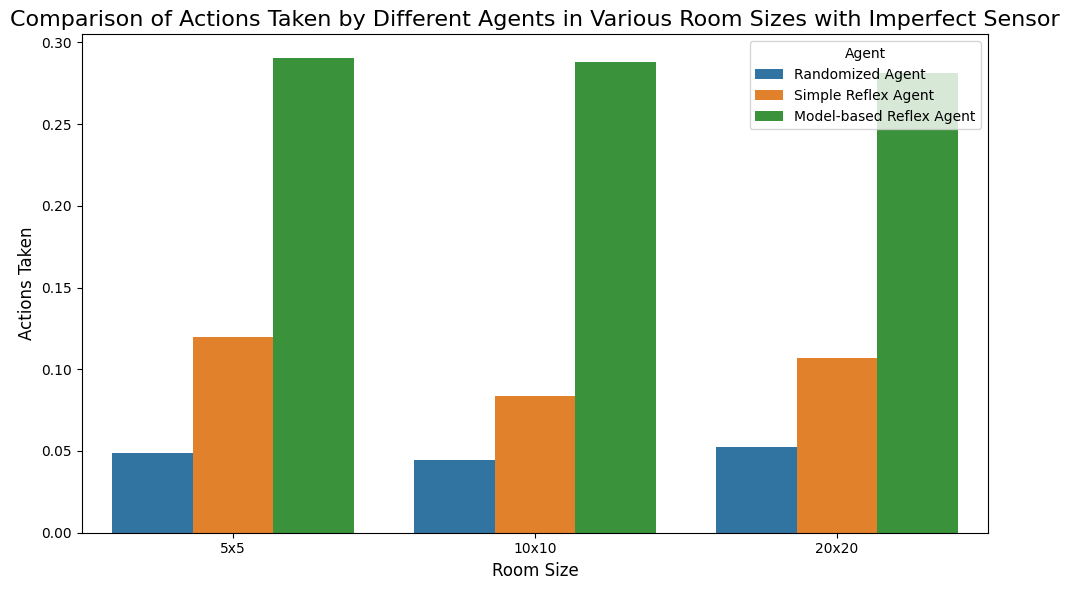

In [148]:
# barplot for comparison

import matplotlib.pyplot as plt
import seaborn as sns

df2_melted = df2.reset_index().melt(id_vars=["Size"], var_name="Agent", value_name="Actions")
plt.figure(figsize=(10, 6))
sns.barplot(x="Size", y="Actions", hue="Agent", data=df2_melted)
plt.title('Comparison of Actions Taken by Different Agents in Various Room Sizes with Imperfect Sensor', fontsize=16)
plt.xlabel('Room Size', fontsize=12)
plt.ylabel('Actions Taken', fontsize=12)
plt.tight_layout()
plt.show()

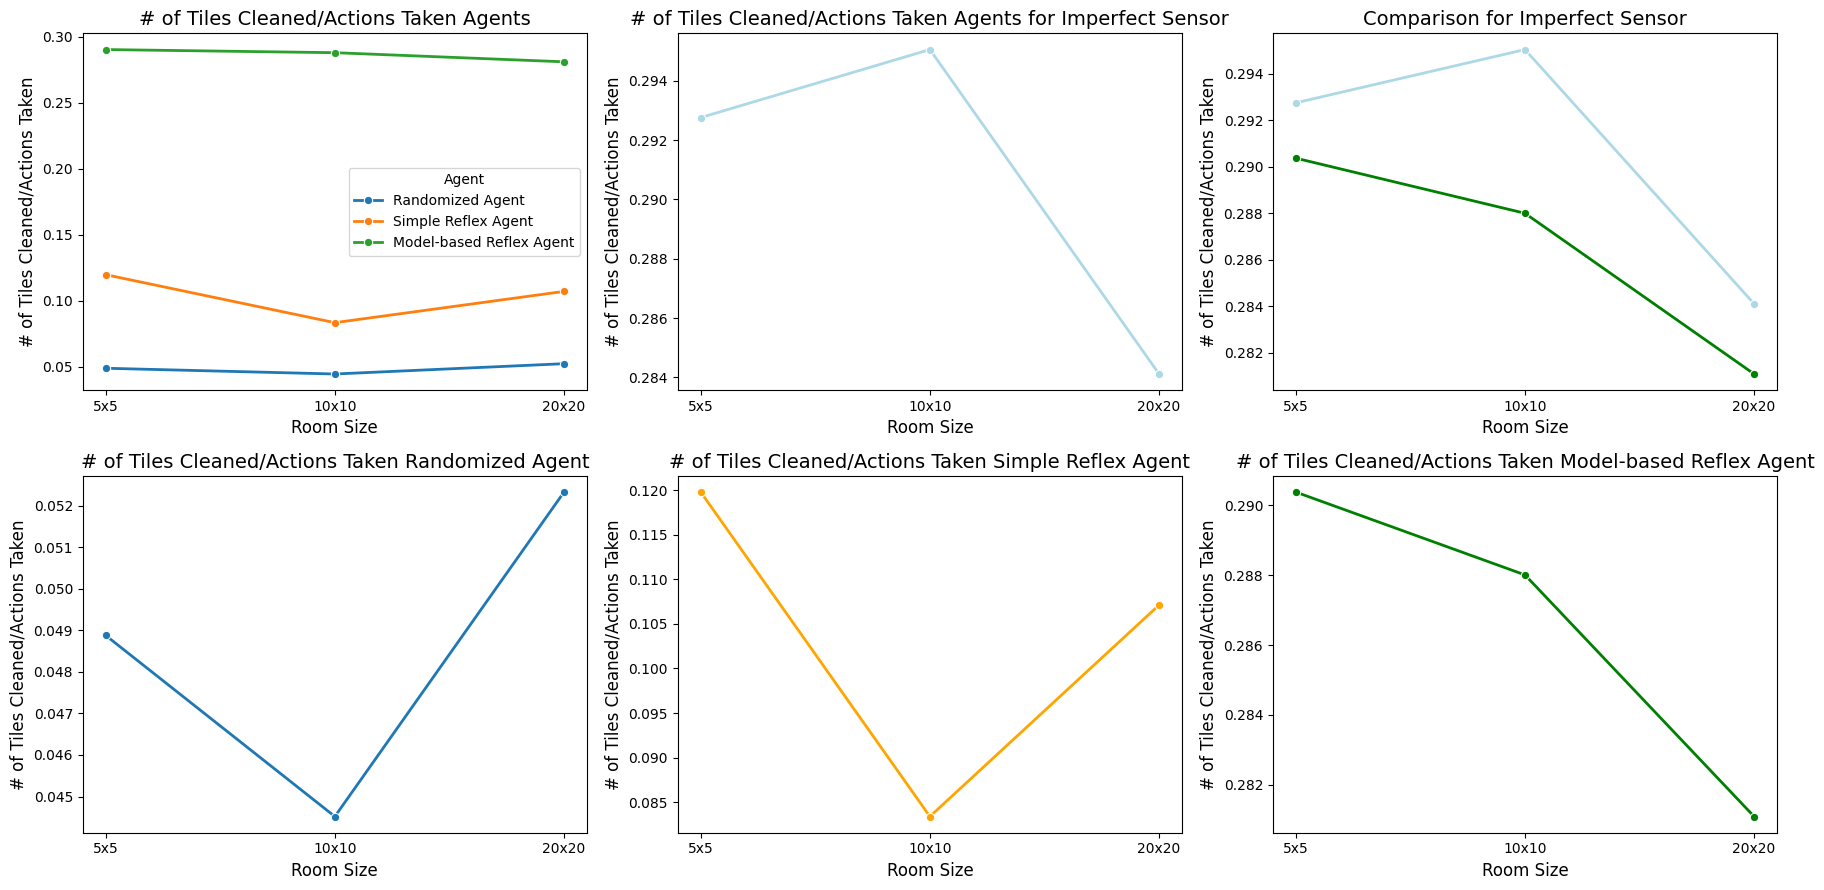

In [155]:
# lineplots for comparison
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(18, 9))

# Regular line plot (all room sizes)
sns.lineplot(x="Size", y="Actions", hue="Agent", data=df2_melted, marker='o', linestyle='-', linewidth=2, ax=axs[0, 0])
axs[0, 0].set_title('# of Tiles Cleaned/Actions Taken Agents', fontsize=14)
axs[0, 0].set_xlabel('Room Size', fontsize=12)
axs[0, 0].set_ylabel('# of Tiles Cleaned/Actions Taken', fontsize=12)


sns.lineplot(x="Size", y="Actions", color = "lightblue", data=df3_melted, marker='o', linestyle='-', linewidth=2, ax=axs[0, 1])
axs[0, 1].set_title('# of Tiles Cleaned/Actions Taken Agents for Imperfect Sensor', fontsize=14)
axs[0, 1].set_xlabel('Room Size', fontsize=12)
axs[0, 1].set_ylabel('# of Tiles Cleaned/Actions Taken', fontsize=12)

sns.lineplot(x="Size", y="Actions", color = "lightblue", data=df3_melted, marker='o', linestyle='-', linewidth=2, ax=axs[0, 2])
sns.lineplot(x="Size", y="Actions", color = "green", data=df2_melted[df2_melted['Agent'] == 'Model-based Reflex Agent'], marker='o', linestyle='-', linewidth=2, ax=axs[0, 2])
axs[0, 2].set_title('Comparison for Imperfect Sensor', fontsize=14)
axs[0, 2].set_xlabel('Room Size', fontsize=12)
axs[0, 2].set_ylabel('# of Tiles Cleaned/Actions Taken', fontsize=12)

# Line plot for Randomized Agent
sns.lineplot(x="Size", y="Actions", data=df2_melted[df2_melted['Agent'] == 'Randomized Agent'],
             marker='o', linestyle='-', linewidth=2, ax=axs[1, 0])
axs[1, 0].set_title('# of Tiles Cleaned/Actions Taken Randomized Agent', fontsize=14)
axs[1, 0].set_xlabel('Room Size', fontsize=12)
axs[1, 0].set_ylabel('# of Tiles Cleaned/Actions Taken', fontsize=12)

# Line plot for Simple Reflex Agent
sns.lineplot(x="Size", y="Actions", data=df2_melted[df2_melted['Agent'] == 'Simple Reflex Agent'],
             marker='o', linestyle='-', linewidth=2, ax=axs[1, 1], color = 'orange')
axs[1, 1].set_title('# of Tiles Cleaned/Actions Taken Simple Reflex Agent', fontsize=14)
axs[1, 1].set_xlabel('Room Size', fontsize=12)
axs[1, 1].set_ylabel('# of Tiles Cleaned/Actions Taken', fontsize=12)

# Line plot for Model-based Reflex Agent
sns.lineplot(x="Size", y="Actions", data=df2_melted[df2_melted['Agent'] == 'Model-based Reflex Agent'],
             marker='o', linestyle='-', linewidth=2, ax=axs[1, 2], color = 'green')
axs[1, 2].set_title('# of Tiles Cleaned/Actions Taken Model-based Reflex Agent', fontsize=14)
axs[1, 2].set_xlabel('Room Size', fontsize=12)
axs[1, 2].set_ylabel('# of Tiles Cleaned/Actions Taken', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

### Improvements Discussion:
With false negatives, the randomized and simple models perform very poorly and even though the model based agent performs significantly better than the other two (as shown by the bar plot above), it also doesn't always fully clean the room. However, by passing the room twice, we decrease the probability of running into a false negative from 10% to 1%. This increases the number of actions but guarantees all tiles are cleaned. This trade off seems to benefit the performance as the number of tiles cleaned per action improved from the original agent (green) to the improved agent (light blue) especially for the 10x10 room as can be seen in the Comparison of Actions for Imperfect Sensor graph above.

## More advanced implementation tasks

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code

## Code repo (not used)

In [ ]:
# define environment based on max_steps
def proper_max_steps_environment(agent_function, max_steps, verbose = True):
  #define necessary variables
    num_cleaned = 0
    rng = np.random.default_rng()
    p = 0.5
    n = 5
    floor = rng.choice([True, False], size = (n, n), p = [p, 1-p])
    position = [0, 0]
    dirt = floor.sum()

    # stop based on max_steps passed in
    for i in range(max_steps):
        dirty = floor[position[0], position[1]]

        # define action and change position/environment
        action = agent_function(bumpers, dirty)

        if (action == "suck"):
          if (floor[position[0], position[1]]):
            num_cleaned = num_cleaned + 1
            floor[position[0], position[1]] = False
        elif (action == "north"):
          if (position[1] == 0):
            i -= 1
          else:
            position[1] -= 1
        elif (action == "south"):
          if (position[1] == n-1):
            i -= 1
          else:
            position[1] += 1
        elif (action == "west"):
          if (position[0] == 0):
            i -= 1
          else:
            position[0] -= 1
        elif (action == "east"):
          if (position[0] == n-1):
            i -= 1
          else:
            position[0] += 1

        if (verbose): print("step", i , "- action:", action, "position: ", position)

    return num_cleaned, dirt